$dX_t = (cX_t+du_t)dt+\sigma dB_t$

$\inf_u\mathbb{E}\bigg[\int_0^T(aX_t^2+bX_t+Au_t^2+Bu_t)dt+\alpha X_T^2+\beta X_T \bigg]$

We are going to implement a code for this Linear Quadratic Control problem 

The HJB equation is given by

$0=\partial_t V(t,x)+\frac{\sigma^2}{2}\partial_x^2V(t,x) +cx\partial_xV(t,x)+ax^2+bx+\inf_u\Big[Au^2+\Big(B+d\partial_xV(t,x)\Big)u\Big]$

$V(T,x)=\alpha x^2+\beta x$.

The optimal solution solution obtained as
$u^*=-\frac{B+d\partial_xV(t,x)}{2A}$
depends on the value function $V(t,x)$, which is the solution of the following PDE
$0=\partial_t V(t,x)+\frac{\sigma^2}{2}\partial_x^2V(t,x) +cx\partial_xV(t,x)+ax^2+bx-\frac{\big(B+d\partial_xV(t,x)\big)^2}{4A}$

$V(T,x)=\alpha x^2+\beta x$.
We assume that the value function is quadratic in $x$,

$V(t,x)=f(t)x^2+h(t)x+k(t)$. 

By substituting $V$ in the HJB PDE we get the following system of Riccati ODE.

$0=f'+a+2cf-\frac{d^2}{A}f^2;  f(T)=\alpha$

$0=h'+b-\frac{(B+dh)d}{A}f;  h(T)=\beta$

$0=k'+\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(T)=\gamma$

By solving this system of first order ODE we can get $f,h,t$ in closed form and we obtain the optimal solution as

$u^*=-\frac{B+d(2xf(t)+h(t))}{2A}$

First let's write all equations forward and then change $t$ to $T-t$ at the end.

$f'=a+2cf-\frac{d^2}{A}f^2;  f(0)=\alpha$

$h'=b-\frac{(B+dh)d}{A}f;  h(0)=\beta$

$k'=\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(0)=\gamma$

$f$ satisfies a Riccati ODE: $f(t)=-\dfrac{1}{q_2}\dfrac{\lambda_1 e^{\lambda_1 t}+C\lambda_2 e^{\lambda_2 t}}{ e^{\lambda_1 t}+C e^{\lambda_2 t}}$ with

$C=-\dfrac{\lambda_1+q_2\alpha}{\lambda_2+q_2\alpha}$, $q_2=-\dfrac{d^2}{A}$, $q_1=2c$, $q_0=a$, $\lambda_1=\dfrac{q_1+\sqrt{q_1^2-2q_0q_2}}{2}$, and $\lambda_2=\dfrac{q_1-\sqrt{q_1^2-2q_0q_2}}{2}$


$h'=b-\frac{Bd}{A}f+(c-\frac{d^2}{A}f)h = b-\frac{Bd}{A}f+(c+q_2f)h ;  h(0)=\beta$

$h'-(c+q_2f)h= b-\frac{Bd}{A}f$


$\left( e^{-(ct+q_2\int fdt)}h\right)'= e^{-ct-q_2\int fdt}(b-\frac{Bd}{A}f)$


In the process of finding $f$, we note that $f = -\dfrac{U'(t)}{q_2U(t)}$, where $U(t)=e^{\lambda_1 t}+Ce^{\lambda_2 t}$. Thus,

$-q_2\int f dt = \ln U(t)$ and $e^{-q_2\int fdt}=U(t)$.


$e^{-ct}U(t) h(t) = \int e^{-cs}U(s)(b-\frac{Bd}{A}f(s))ds = \int e^{-ct}U(s)(b+\frac{Bd}{A}\dfrac{U'(s)}{q_2U(s)})ds= \int e^{-cs}(U(s)b-\frac{B}{d}{U'(s)})ds$


$h(t) =  \dfrac{e^{ct}}{U(t)}\int e^{-cs}(U(s)b+\frac{B}{d}{U'(s)})ds= \dfrac{b(\frac{1}{\lambda_1-c}e^{\lambda_1 t}+C\frac{1}{\lambda_2-c}e^{\lambda_2t} )-\frac{B}{d}(\frac{\lambda_1}{\lambda_1-c}e^{\lambda_1t}+C\frac{\lambda_2}{\lambda_2-c}e^{\lambda_2t})+C_2 e^{ct}}{U(t)}$, where $C_2$ is such that $h(0)=\beta$:

$C_2=\beta(1+C)-b(\frac{1}{(\lambda_1-c)}+\frac{C}{(\lambda_2-c)})+\frac{B}{d}(\frac{\lambda_1}{(\lambda_1-c)}+C\frac{\lambda_2}{(\lambda_2-c)})$

For $k'=\sigma^2 f-\frac{1}{4A}(B+dh)^2;  k(0)=0$:

$\sigma^2\int f dt = -\dfrac{\sigma^2}{q_2}\ln U(t) +C_3$


To find $\int (B+dh)^2 dt$ note that $B+dh=b\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}$

$\int (B+dh)^2 dt=b^2\displaystyle\int \left(\dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}+C_2}{U(t)}\right)^2dt=b^2\displaystyle\int \dfrac{(\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t})^2}{U^2(t)}dt+2b^2C_2\displaystyle\int \dfrac{\frac{1}{\lambda_1}e^{\lambda_1 t}+C\frac{1}{\lambda_2}e^{\lambda_2 t}}{U^2(t)}dt+C^2_2\displaystyle\int \dfrac{1}{U^2(t)}dt$ 

The above three integrals are evaluated here:

https://www.wolframalpha.com/input?i=%5Cint+%28n+%2B+c+me%5E%7Bbt%7D%29%2F%28%281%2B+c+e%5E%7Bbt%7D%29%5E2%29dt

https://www.wolframalpha.com/input?i=%5Cint+%28%28n+%2B+c+me%5E%7Bbt%7D%29%5E2%29%2F%28%281%2B+c+e%5E%7Bbt%7D%29%5E2%29dt

https://www.wolframalpha.com/input?i=%5Cint+1%2F%28%28e%5E%7Bat%7D%2B+c+e%5E%7Bbt%7D%29%5E2%29dt







In [13]:

import numpy as np
import time
from scipy import misc
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(style='normal', size=20)
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
from matplotlib import cm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import math
import pandas as pd
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

import json

from IPython.display import display, Math, Markdown
import seaborn as sns
sns.set(font_scale = 2)

import pandas as pd


In [ ]:
lqsc_params = {
    'T':1,
    'a':100,
    'b':0.1,
    'c':-1,
    'd':1,
    'A':10,
    'B':1,
    'sigma':1,
    'alpha':1,
    'beta':1,
    'gamma':0.0,
    'num_time_steps':10,
    }
''' f=h for the following
lqsc_params = {
    'T':1,
    'a':0.1,
    'b':0.1,
    'c':-1,
    'd':1,
    'A':1,
    'B':1,
    'sigma':1,
    'alpha':1,
    'beta':1,
    'gamma':0.0,
    'num_time_steps':10,
    }
'''
# lqsc_params = {
#     'T':1,
#     'a':10,
#     'b':0.1,
#     'c':1.5,
#     'd':-1.,
#     'A':0.1,
#     'B':0.1,
#     'sigma':0.5,
#     'alpha':0.1,
#     'beta':0.1,
#     'gamma':0.0,
#     'num_time_steps':10,
#     }


" f=h for the following\nlqsc_params = {\n    'T':1,\n    'a':0.1,\n    'b':0.1,\n    'c':-1,\n    'd':1,\n    'A':1,\n    'B':1,\n    'sigma':1,\n    'alpha':1,\n    'beta':1,\n    'gamma':0.0,\n    'num_time_steps':10,\n    }\n"

In [15]:
# Define the system of ODEs
class Riccati(object):
    def __init__(self, params):
        self.params = params
        self.num_time_steps = self.params['num_time_steps']
        self.T = self.params['T']
        self.a = self.params['a']
        self.b = self.params['b']
        self.c = self.params['c']
        self.d = self.params['d']
        self.A = self.params['A']
        self.B = self.params['B']
        self.sigma = self.params['sigma']
        self.alpha = self.params['alpha']
        self.beta = self.params['beta']
        self.gamma = self.params['gamma']
        # Initial conditions
        self.initial_conditions = [self.alpha, self.beta, self.gamma]  # Initial values for y1, y2, and y3
        q0=self.a
        q1=2*self.c
        q2 = -self.d**2/self.A
        lb1=0.5*(q1+np.sqrt(q1**2-4*q0*q2))
        lb2 = -lb1+q1
        C1 = -(lb1+q2*self.alpha)/(lb2+q2*self.alpha)
        C2 = self.beta*(1+C1)-self.b*(1/(lb1-self.c)+C1/(lb2-self.c))+self.B/self.d*(lb1/(lb1-self.c)+C1*lb2/(lb2-self.c))
        self.f_func = lambda t: -1/q2*(lb1*np.exp(lb1*(self.T-t))+C1*lb2*np.exp(lb2*(self.T-t)))/(np.exp(lb1*(self.T-t))+C1*np.exp(lb2*(self.T-t)))
        self.h_func = lambda t: (self.b*((1/(lb1-self.c))*np.exp(lb1*(self.T-t))+C1*(1/(lb2-self.c))*np.exp(lb2*(self.T-t)))-self.B/self.d*((lb1/(lb1-self.c))*np.exp(lb1*(self.T-t))+C1*(lb2/(lb2-self.c))*np.exp(lb2*(self.T-t)))+C2*np.exp(self.c*(self.T-t)))/(np.exp(lb1*(self.T-t))+C1*np.exp(lb2*(self.T-t)))
        self.integrand = lambda t: self.sigma**2*self.f_func(self.T-t) -(self.B+self.d*self.h_func(self.T-t))**2/(4*self.A)
        self.k_func = lambda t: integrate.quad(lambda x: self.integrand(x), 0, self.T-t)[0]      
        
    def __call__(self,tx):
            return np.array([self.f_func(tx[i,0])*np.power(tx[i,1],2)+self.h_func(tx[i,0])*tx[i,1]+self.k_func(tx[i,0]) for i in range(tx.shape[0])])
  

    def system_of_odes(self, t, y):
        dydt = [
            self.a+2*self.c*y[0]-(np.power(self.d,2)*np.power(y[0],2))/self.A,                 # df/dt = a+2cf-d^2*f^2/A; f(0)=alpa
            self.b+self.c*y[1]-(self.B+self.d*y[1])*self.d*y[0]/self.A,                       # dh/dt = b-(B+dh)fd/A; h(0)=beta
            np.power(self.sigma,2)*y[0]-(self.B+self.d*y[1])**2/(4*self.A)        # dk/dt = sigma^2*f-(B+dh)^2/4A; k(0)=0
        ]
        return dydt

    def approx_sol(self):
        # Time span
        t_span = (0, self.T)  # Start and end time
        t_eval=np.linspace(0, self.T, self.num_time_steps+1)
        # Solve the system of ODEs
        sol = solve_ivp(self.system_of_odes,t_span, self.initial_conditions, t_eval=t_eval)
        #
        f=np.flip(sol.y[0])
        h=np.flip(sol.y[1])
        k=np.flip(sol.y[2])
        return (sol.t,f,h,k)
    
        



In [16]:
r = Riccati(lqsc_params)

In [17]:
t, f,h,k = r.approx_sol()

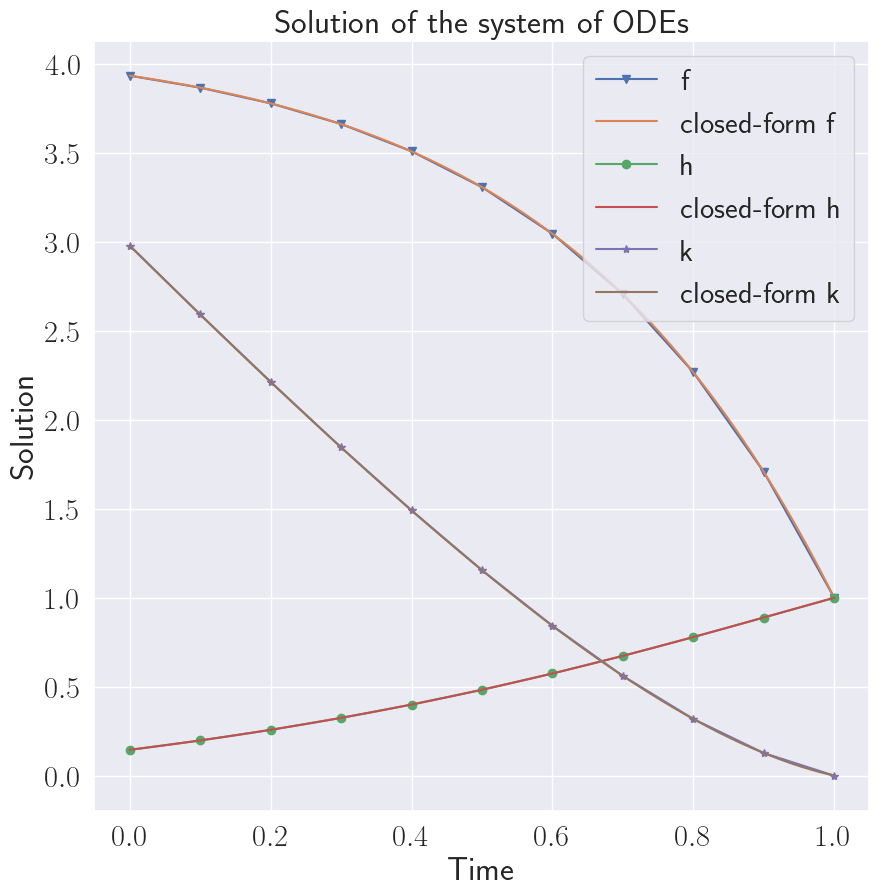

In [18]:
# Plot the solution
ti = np.linspace(0,r.T,1000);
plt.figure(figsize=(10,10),dpi=100);
plt.plot(t, f, label='f',marker='v', markevery=1)
plt.plot(ti,r.f_func(ti), label='closed-form f')
plt.plot(t, h, label='h',marker='o', markevery=1)
plt.plot(ti,r.h_func(ti), label='closed-form h')
plt.plot(t, k, label='k',marker='*', markevery=1)
plt.plot(ti,[r.k_func(v) for v in ti], label='closed-form k')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.title('Solution of the system of ODEs')


plt.legend()
plt.grid(True)
plt.show()
# print(t_eval)
# print(f.shape,state_var.shape)

In [19]:
class solution(object):
    def __init__(self, params):
        self.r = Riccati(params)      
    def __call__(self,tx):
            return np.array([self.r.f_func(tx[i,0])*np.power(tx[i,1],2)+self.r.h_func(tx[i,0])*tx[i,1]+self.r.k_func(tx[i,0]) for i in range(tx.shape[0])])
    def optimal_policy(self,tx):
            return np.array([2*self.r.f_func(tx[i,0])*tx[i,1]+self.r.h_func(tx[i,0]) for i in range(tx.shape[0])])      

In [20]:
sol = solution(lqsc_params)
def surf_eval(t,x):
    K = t.shape[0]
    y = np.concatenate((np.expand_dims(t,-1),np.expand_dims(x,-1)),axis=-1)
    return sol(y.reshape(K**2,2)).reshape(K,K)

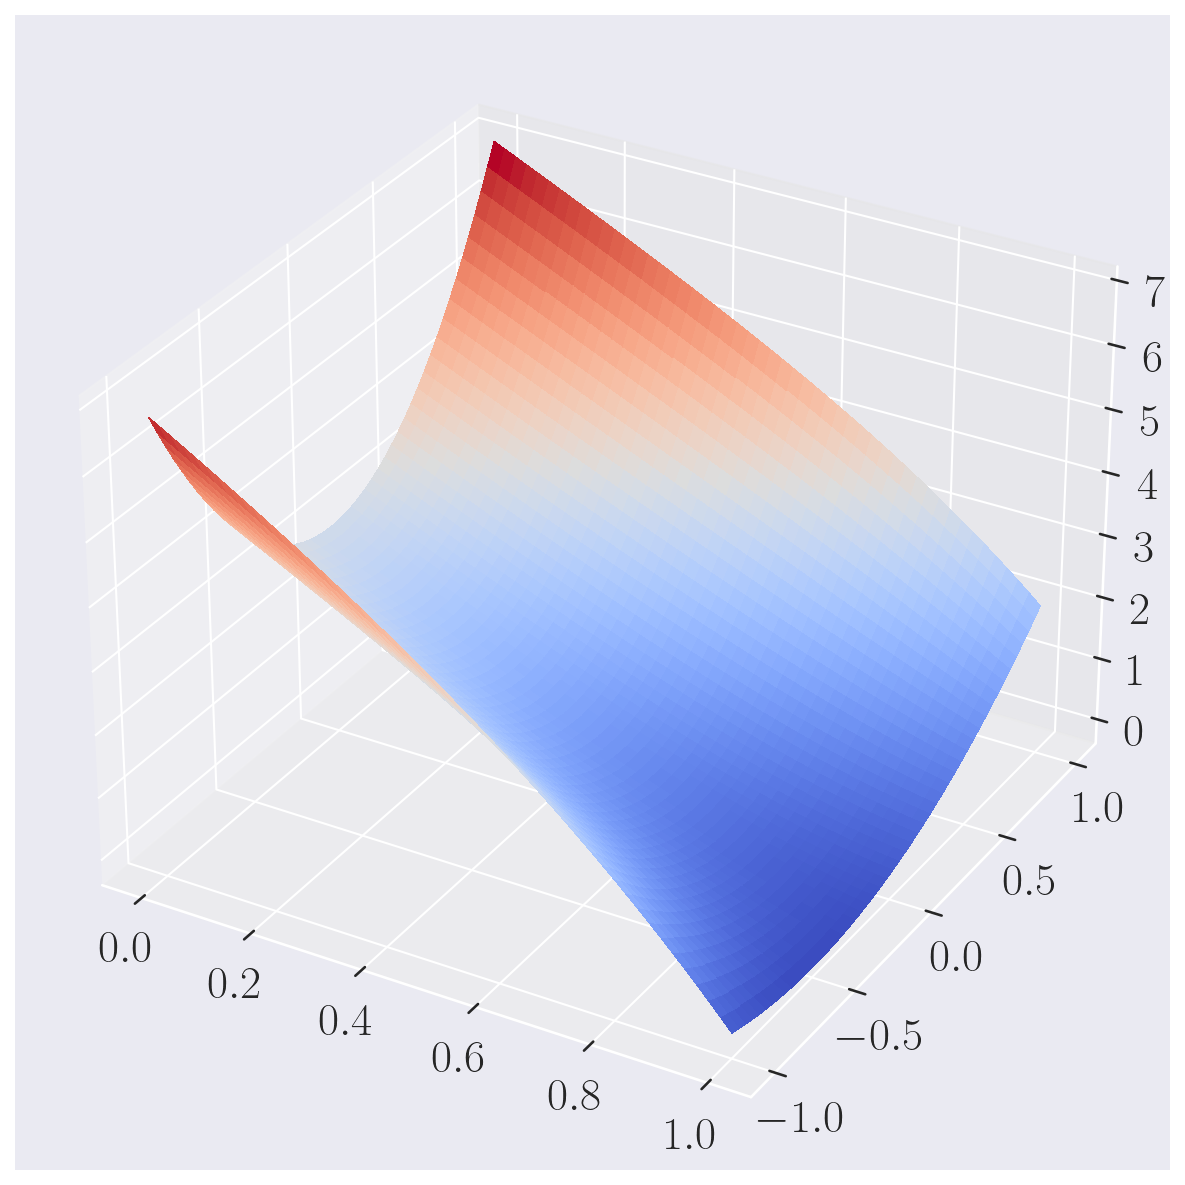

In [21]:
K = 50
X = np.linspace(-1,1,K)
T = np.linspace(.0,1.,K)
t,x = np.meshgrid(T,X)
y = surf_eval(t,x)
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"},dpi=150)
surf = ax.plot_surface(t, x, y, cmap=cm.coolwarm,linewidth=0, antialiased=False)
